<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Independent Practice

In [2]:
import pandas as pd
from datetime import timedelta
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

## Walmart Sales Data

For this independent practice, we'll analyze Walmart's weekly sales data over a two-year period from 2010 to 2012.

The data set is again separated by store and department, but we'll focus on analyzing one store for simplicity.

The data include:

* `Store`: The store number.
* `Dept`: The department number.
* `Date`: Weekly, starting and ending 
* `Weekly_Sales`: Sales for the given department in the given store.
* `IsHoliday`: Whether the week is a special holiday week.

### 1) Preprocess the data using Pandas.

* **Load the data.**
* **Convert the `Date` column to a `datetime` object.**
* **Set `Date` as the index of the DataFrame.**

In [4]:
walmart = pd.read_csv('data/train.csv', index_col='Date', parse_dates=True)

In [5]:
walmart.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [6]:
store_filter = walmart['Store'] == 1
w = walmart[store_filter]
w.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [7]:
w.shape

(10244, 4)

In [8]:
w.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [9]:
print("Start date:", w.index.min(), " End date:", w.index.max())

Start date: 2010-02-05 00:00:00  End date: 2012-10-26 00:00:00


### 2) Aggregate over departments to compute the total weekly sales. Store this in a new DataFrame.

In [13]:
w.groupby(w.index.month)['Weekly_Sales'].mean()

Date
1     19586.960647
2     22497.470104
3     21750.978506
4     21601.538801
5     21669.008080
6     22112.893290
7     20915.236384
8     21656.144532
9     20653.544637
10    20711.230628
11    23097.785277
12    24805.467992
Name: Weekly_Sales, dtype: float64

In [15]:
w.groupby(w.index.month)['Weekly_Sales'].sum()

Date
1     11203741.49
2     19505306.58
3     20380666.86
4     21623140.34
5     18505332.90
6     20299636.04
7     20706084.02
8     20118558.27
9     19331717.78
10    19468556.79
11    13350519.89
12    17909547.89
Name: Weekly_Sales, dtype: float64

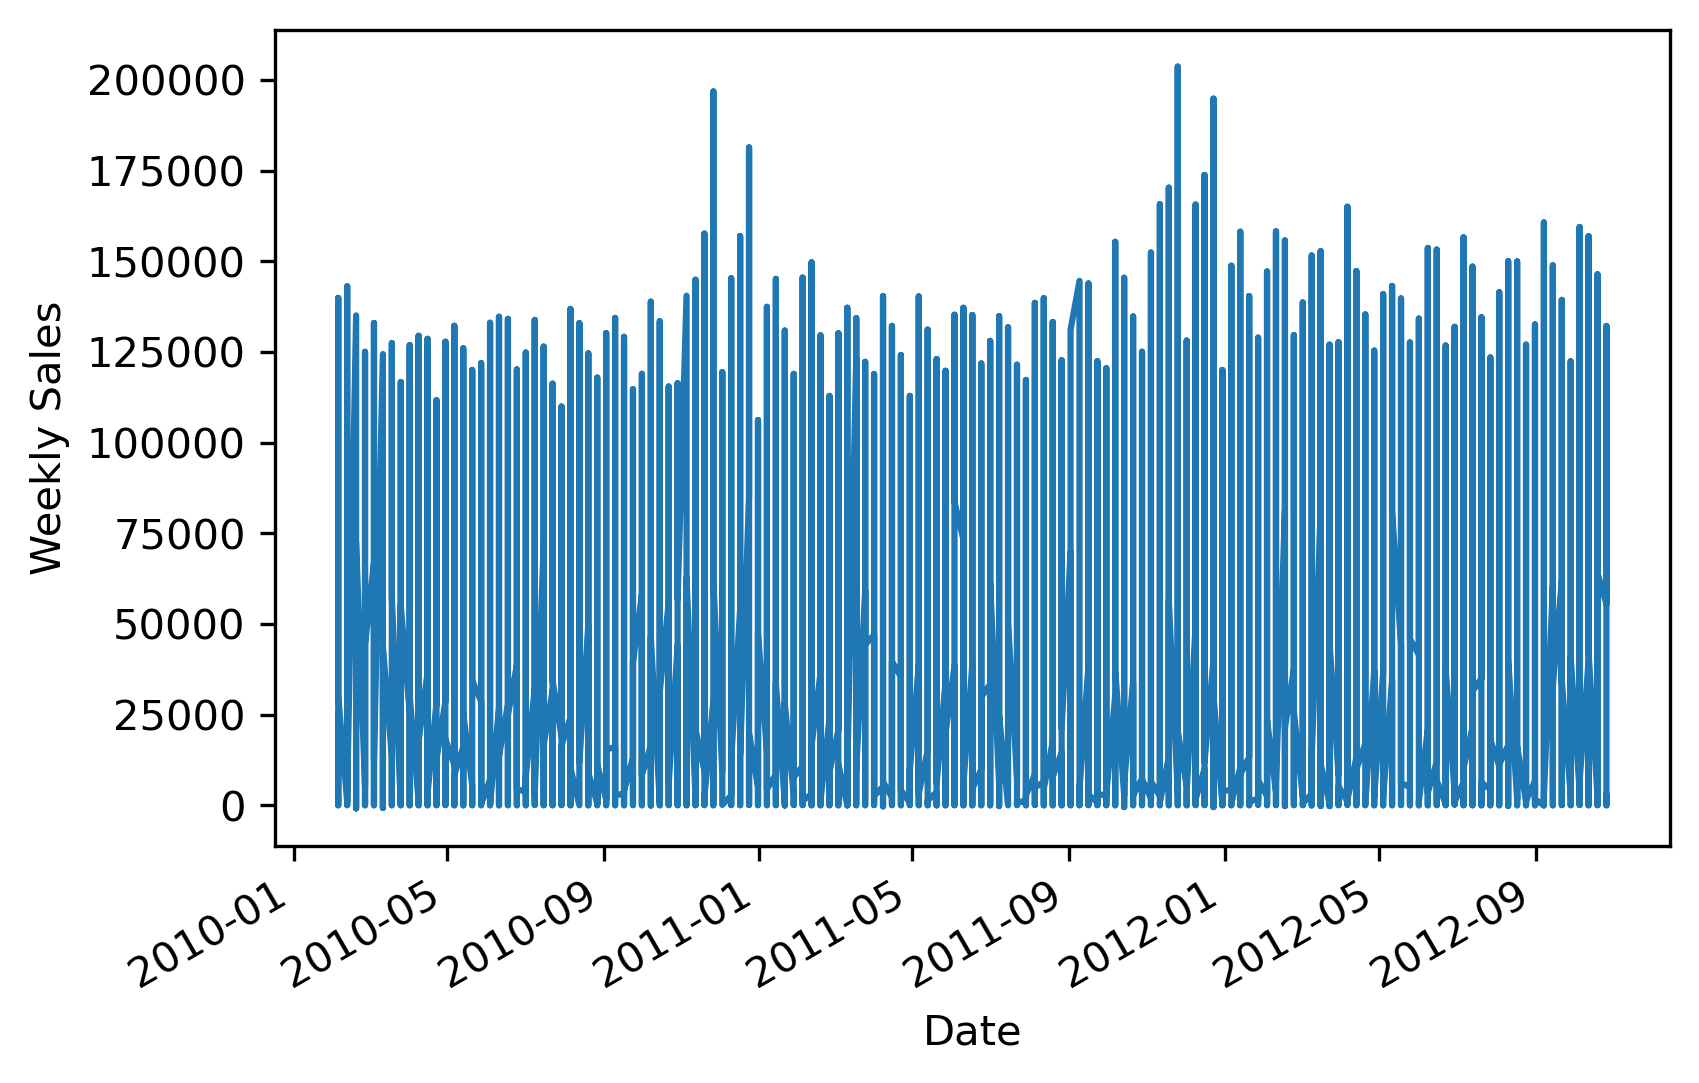

In [14]:
fg, ax = plt.subplots(dpi=300)
w['Weekly_Sales'].plot(ax=ax);
plt.xlabel('Date');
plt.ylabel('Weekly Sales');

In [ ]:
# Spike in sales values during Christmas period
# Generally make more money during Summer months
# Seems stationary but could make it more so using rolling stats

### 3) Plot the rolling mean for `Weekly_Sales`. What general trends do you observe?

In [47]:
w['Weekly_Sales'].rolling(12).mean()

Date
2010-02-05          NaN
2010-02-12          NaN
2010-02-19          NaN
2010-02-26          NaN
2010-03-05          NaN
                ...    
2012-08-31    32.106667
2012-09-07    30.444167
2012-09-14    26.280000
2012-10-05    59.196667
2012-10-12    62.946667
Name: Weekly_Sales, Length: 10244, dtype: float64

<AxesSubplot:xlabel='Date'>

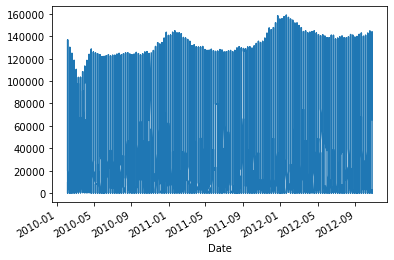

In [46]:
w['Weekly_Sales'].rolling(12).mean().plot()

In [19]:
from sklearn import metrics

In [48]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = metrics.mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True);

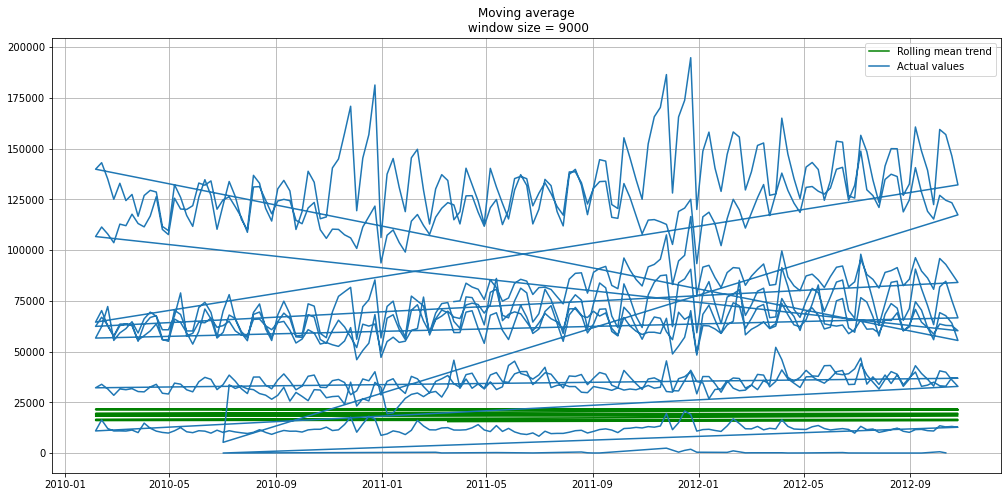

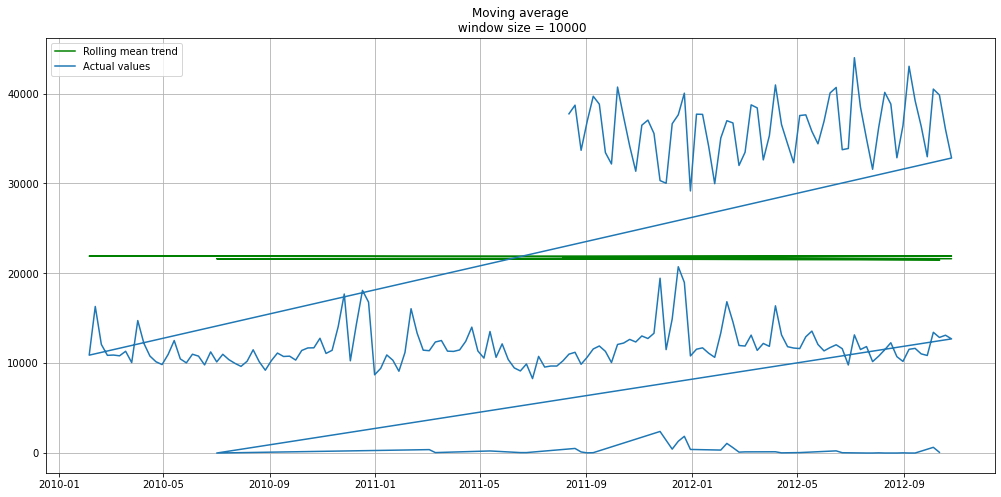

In [56]:
plot_moving_average(w.Weekly_Sales, 9000)

plot_moving_average(w.Weekly_Sales, 10000)

### 4) Compute the `1`, `13`, and `52` autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

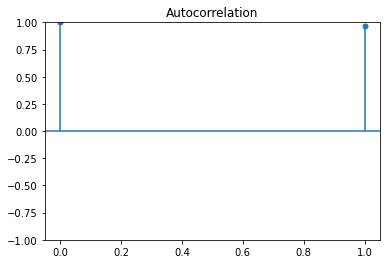

In [27]:
plot_acf(w.Weekly_Sales.values, lags=1);

In [30]:
w['Weekly_Sales'].autocorr(lag=1)

0.9685711543841525

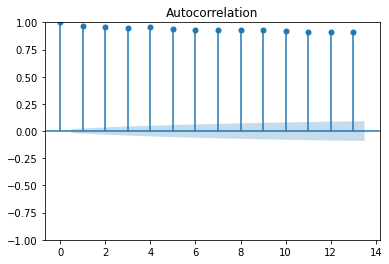

In [28]:
plot_acf(w.Weekly_Sales.values, lags=13);

In [31]:
w['Weekly_Sales'].autocorr(lag=13)

0.9105506301413795

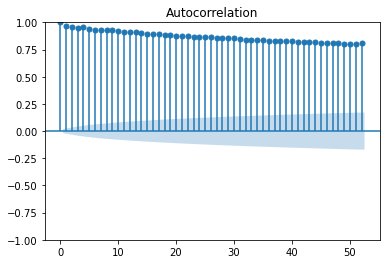

In [29]:
plot_acf(w.Weekly_Sales.values, lags=52);

In [32]:
w['Weekly_Sales'].autocorr(lag=52)

0.811974627680218

In [ ]:
# Autocorrelation gets less as lags increase, but data is highly correlated

### 5) Create a decomposition plot for the Store 1 sales data. 

In [43]:
# Use frequency of 12 because time data is monthly
decomposition = seasonal_decompose(w.Weekly_Sales, model='additive', period=7)

<Figure size 432x288 with 0 Axes>

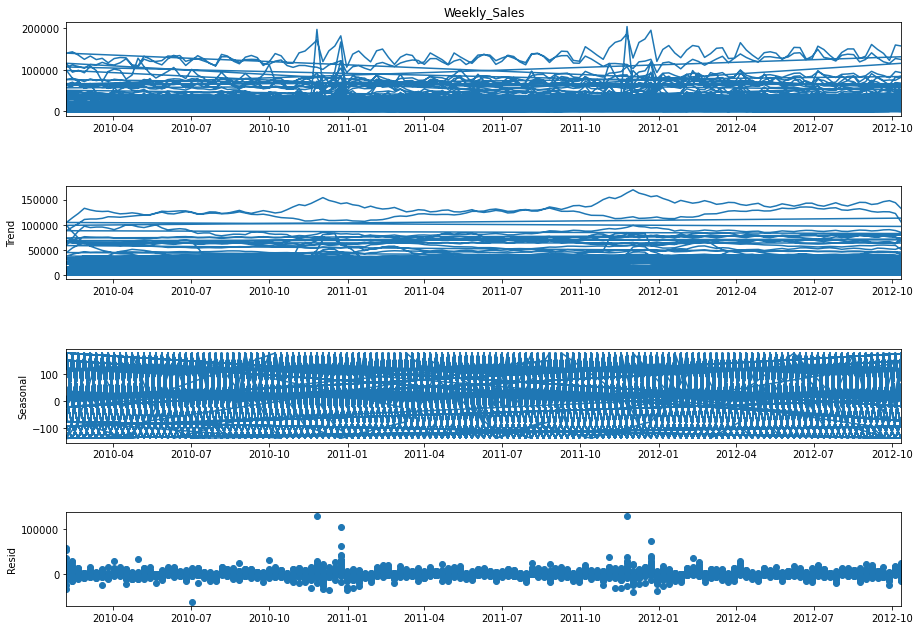

In [44]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 10)

In [ ]:
# There is no seasonality in time series
# Residual plot also shows around zero so decomposition could not separate noise from the trend
# Time series mostly characterised by trend, with no seasonality so smaller lag times

### 6) Based on the analyses above, what can we deduce about this time series?

In [ ]:
# Mean, variance, and autocorrelation do not change over time meaning stationary time series

In [ ]:
train = w[:'2012-01-01'] # dataset to train
test = w['2012-01-01':] # dataset to test